<a href="https://colab.research.google.com/github/edwardb1203/DevFest2022/blob/main/Edward_DevFest_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a Movie Recommendation System

## Adapted from [this notebook in Kaggle](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook)

What is a recommendation system? 

*   It's a personalized suggestion based on your searches
*   Uses algorithmic system to fill your feed
i.e.YouTube and/or Medium



#SETUP

In [ ]:
import pandas as pd 
import numpy as np 

#Import plt for plotting data
import matplotlib.pyplot as plt

#-------- For Content Based Filtering
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Import linear_kernel for similarity matrix
from sklearn.metrics.pairwise import linear_kernel

# Import literal_eval
from ast import literal_eval 

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

# Import the Cosine Similarity matrix for the count_matrix
from sklearn.metrics.pairwise import cosine_similarity




## Get Data from Kaggle



1.   Go to https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download 
2.   Make sure to download 


> Tmdb_5000_movies.csv


> Tmdb_5000_credits.csv

3. Come back to this Colab, click on the folder icon
4. Upload the csv files 

In [ ]:
df1=pd.read_csv('/tmdb_5000_credits.csv')
df2=pd.read_csv('/tmdb_5000_movies.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [ ]:
#testing
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#Filtering Data Based on Demographic



*  We need a metric to score or rate movie
*Calculate the score for every movie
*Sort the scores and recommend the best rated movie to the users.



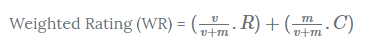



*   'v' is the number of votes for the movie
* 'm' is the minimum votes required to be listed in the chart
* 'R' is the average rating of the movie
* 'C' is the mean vote across the whole report



In [ ]:
from numpy.ma.extras import average
#find the mean vote - C
C = df2['vote_count'].mean()
print("The average vote is: " + str(C))



The average vote is: 690.2179887570269


In [ ]:
#find the minimum votes required
m = df2['vote_count'].quantile(0.9)
print("The minimum vote required is: " + str(m))

The minimum vote required is: 1838.4000000000015


In [ ]:
#filter out movies that qualify
q_movies = df2.copy().loc[df2['vote_count'] >= m]
print("The amount of movie that qualify: " + str(q_movies.shape[0]))

The amount of movie that qualify: 481


In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)


In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
2585,The Hurt Locker,1840,7.2,348.560448
195,Night at the Museum: Secret of the Tomb,1851,6.1,346.990798
1405,The Pianist,1864,8.0,346.750419
2454,Dumb and Dumber,1859,6.5,346.454333
597,Underworld: Awakening,1862,6.1,345.977449
1061,Love Actually,1869,7.0,345.789435
1173,The Intern,1881,7.1,344.746962
137,Kung Fu Panda 2,1880,6.7,344.635529
637,Les Misérables,1884,7.1,344.474842
1594,Corpse Bride,1894,7.2,343.621678


Text(0.5, 1.0, 'Popular Movies')

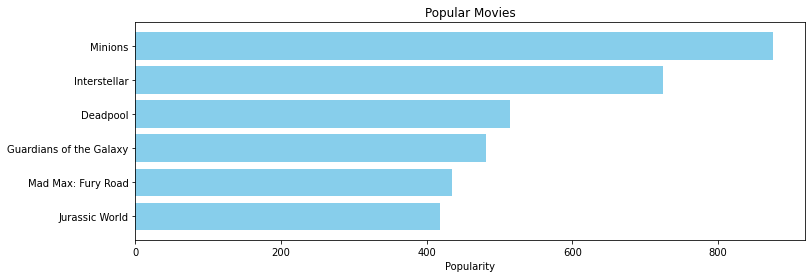

In [ ]:
#Plot the Overall Popular Movies 
pop= df2.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

